1. Numerical Differentiation

Forward/Backward/Central vs. Truth

Objective: Compare finite-difference schemes and empirically recover error orders.

Core Concept: Forward, backward, and central differences; error order.

Task: Implement derivatives using forward, backward, central schemes. Sweep step sizes and
compute error against analytic derivative. Plot error vs. h on log–log scale and confirm orders.

Learning Outcome: Understand stencil accuracy and confirm error orders.

In [78]:
import numpy as np
import matplotlib.pyplot as plt

Forward Difference Approximation

$f'(x)=\frac{f(x+h)-f(x)}{h}+O(h)$

In [79]:
def forward_difference(f, x, h=1e-5):
    """Compute the forward difference approximation of the derivative."""
    return (f(x + h) - f(x)) / h

forward_difference.__name__ = "forward difference"

Backward Difference Approximation

$f'(x)=\frac{f(x)-f(x-h)}{h} + O(h)$ 

In [80]:
def backward_difference(f, x, h=1e-5):
    """Compute the backward difference approximation of the derivative."""
    return (f(x) - f(x - h)) / h

backward_difference.__name__ = "backwards difference"

Both forward and backward methods have errors on the order of $O(h)$. 

However, If we take the sumation of the two methods, we can reduce the error to the order $O(h^2)$, this is becasue all the odd power terms cancel eachother due to a sign difference.

Take the taylor expansion of $f(x+h)$,

$f(x+h)=f(x)+hf'(x)+\frac{h^2}{2!}f''(x)+\frac{h^3}{3!}f'''(x)+ \dots$

And again of $f(x-h)$

$f(x+h)=f(x)-hf'(x)+\frac{h^2}{2!}f''(x)-\frac{h^3}{3!}f'''(x)+ \dots$

No we combine them to make the central difference equation, and as mentioned before, the odd error terms drop out.

$f'(x)=\frac{f(x+h)-f(x-h)}{2h}+O(h^2)$



Now, below is the central difference method implemented as described above.

In [81]:
def central_difference(f, x, h=1e-5):
    """Compute the central difference approximation of the derivative."""
    return (f(x+h) - f(x - h)) / (2*h)

central_difference.__name__ = "central difference"

Lets now compare the various methods, by way of observing their graphs aswell as their absolute error for a range of functions $f(x)$

In [82]:
#================= example usage ==============================
def diff_methods_vs_analytical(g, h=1e-5):
    x = np.linspace(-20, 20, 4000)
    funcs = [forward_difference, backward_difference, central_difference]            
    labels = [f.__name__ for f in funcs]  


    # Create figure and axes
    fig, ax = plt.subplots(figsize=(10, 6))

    for f, name in zip(funcs, labels):
        y = f(g, x, h)                                      # works if your f handles NumPy arrays
        ax.plot(x, y, label=name, linewidth=0.5)

    ax.plot(x, np.cos(x)/x -np.sin(x)/(x**2), label="analytical derivative", linewidth=0.5, color='black', linestyle='--')  # analytical derivative
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_xlabel('x')
    ax.set_ylabel("g'(x)")
    ax.set_title(f'Comparison of Differentiation Methods with h={h}')
    plt.show()

In [83]:
def   g(x):
    return np.sin(x)**2/x

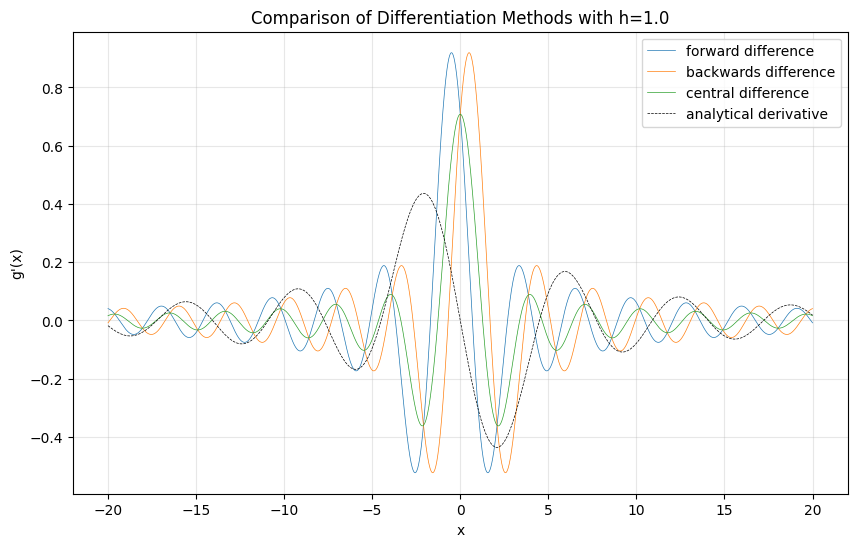

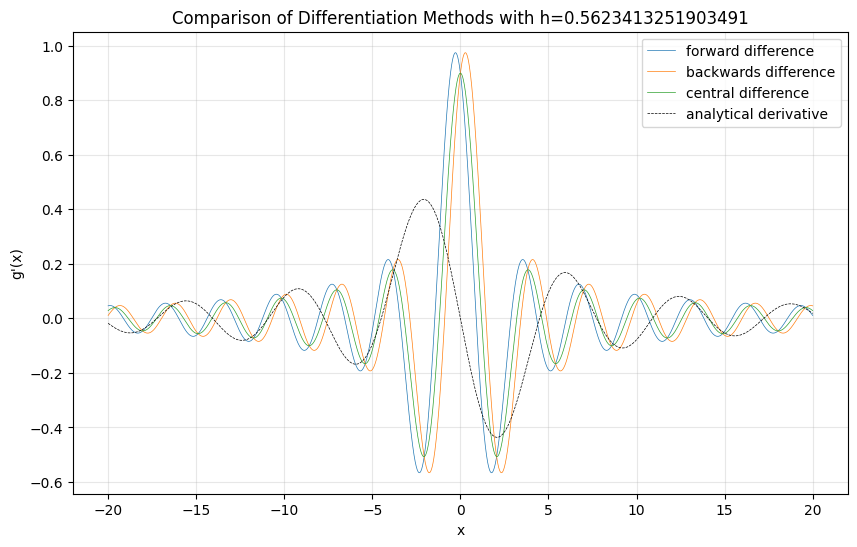

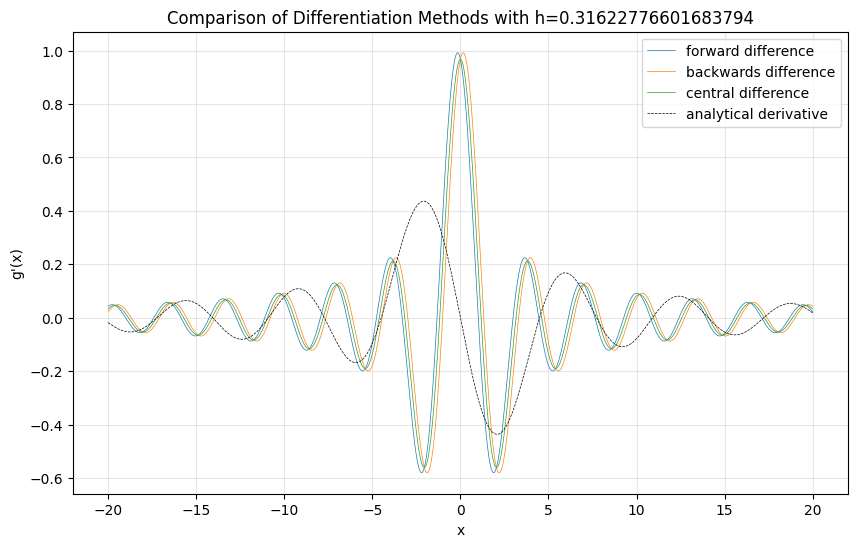

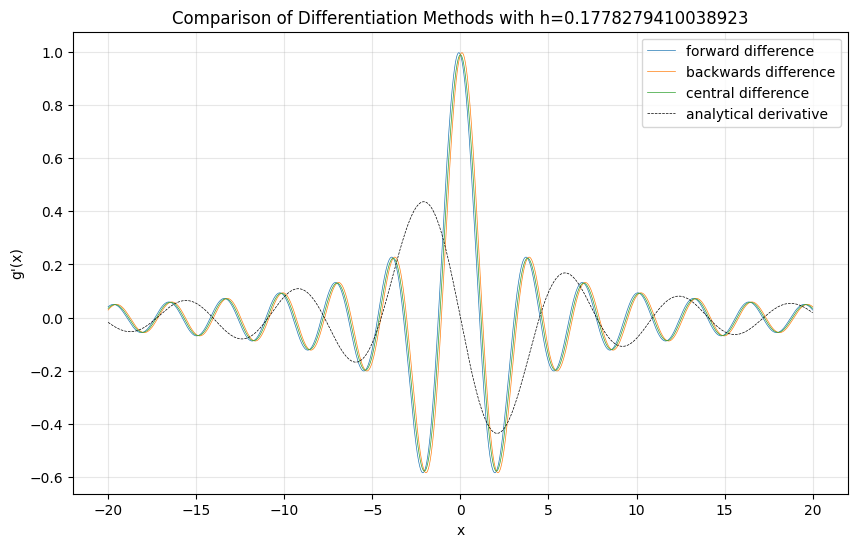

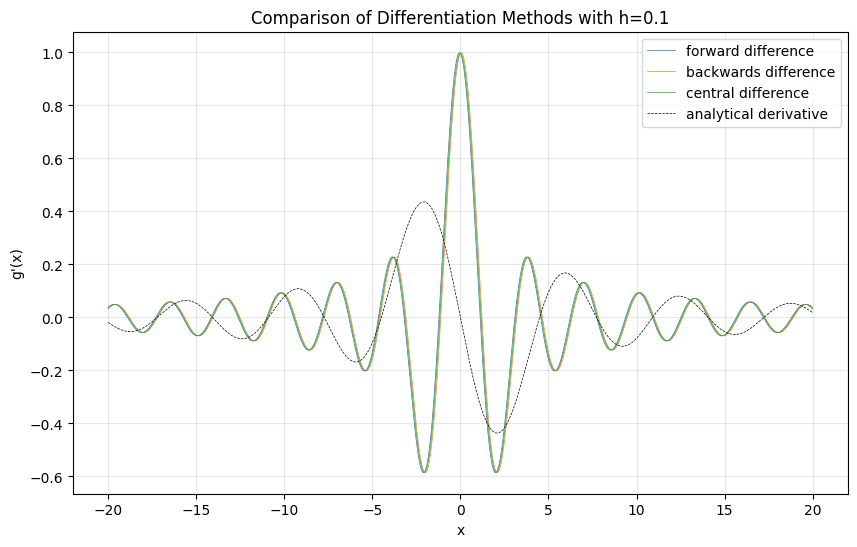

In [84]:
hs = np.logspace(0, -1, 5)
for i in range(len(hs)):
    diff_methods_vs_analytical(g,hs[i])